In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive
!unzip BrixIA_small.zip -d /content/
%cd /content/gdrive/MyDrive/Colab\ Notebooks

/content/gdrive/MyDrive
Archive:  BrixIA_small.zip
   creating: /content/BrixIAsmall/
 extracting: /content/BrixIAsmall/1000186638823204855.jpg  
 extracting: /content/BrixIAsmall/10003057218476364498.jpg  
 extracting: /content/BrixIAsmall/10005836788378209022.jpg  
 extracting: /content/BrixIAsmall/10011454155587105152.jpg  
 extracting: /content/BrixIAsmall/10015354220486554048.jpg  
 extracting: /content/BrixIAsmall/10026271850367430724.jpg  
 extracting: /content/BrixIAsmall/10027044307414466695.jpg  
 extracting: /content/BrixIAsmall/10027500604909952472.jpg  
 extracting: /content/BrixIAsmall/10028581328861447555.jpg  
 extracting: /content/BrixIAsmall/10030929591921881379.jpg  
 extracting: /content/BrixIAsmall/10033197056718477486.jpg  
 extracting: /content/BrixIAsmall/10035224449436813523.jpg  
  inflating: /content/BrixIAsmall/10035460540358990759.jpg  
 extracting: /content/BrixIAsmall/10041725761462052086.jpg  
 extracting: /content/BrixIAsmall/10048055821047131413.jpg  


In [3]:
pip install torchray

     |████████████████████████████████| 378kB 7.8MB/s 
  Created wheel for torchray: filename=torchray-1.0.0.2-cp36-none-any.whl size=444027 sha256=3c543d98b451ab83c434e44bf0f2ddf9963406d7be1d5a8bd373e6f0690fac46
  Stored in directory: /root/.cache/pip/wheels/49/21/6d/e6794f79658b66a0775b164fdd274b81a4c96e4eab5baaacb0
Successfully built torchray


In [5]:
import visualize_prediction as V
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

PATH_TO_IMAGES = "/content/BrixIAsmall"
PATH_TO_MODEL = '/content/classification_checkpoint_best'

dataloader, model= V.load_data(PATH_TO_IMAGES, None, PATH_TO_MODEL, fold='test', covid=True)
print("Cases for review:")
print(len(dataloader))

# Class label to evaluate on ('NoCovid', 'LowCovid', 'MildCovid', 'SevereCovid')
LABEL = 'MildCovid'

Cases for review:
207


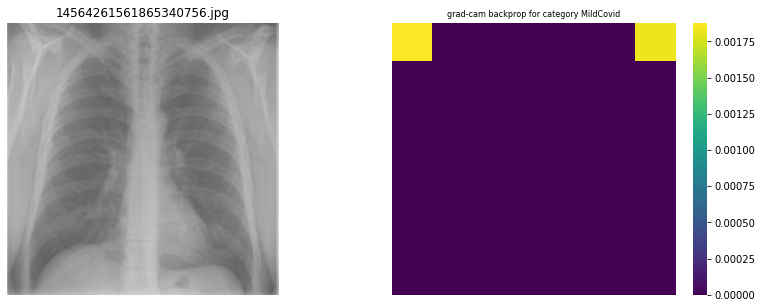

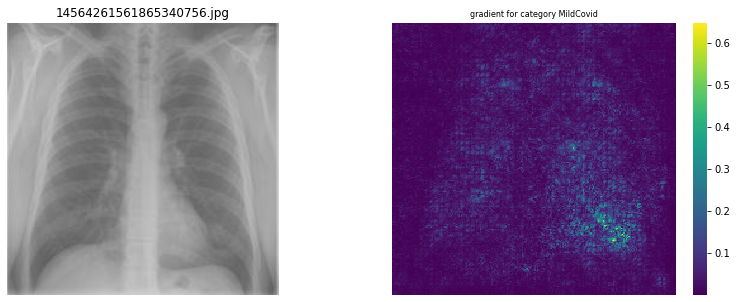

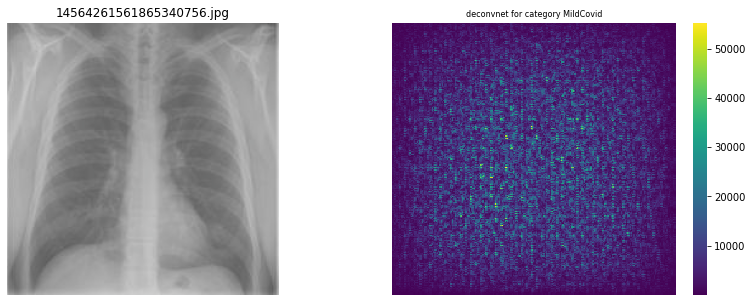

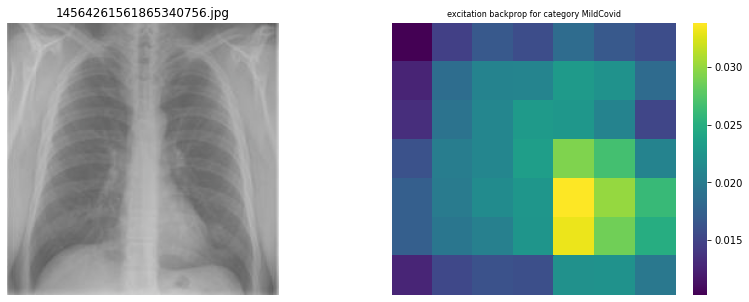

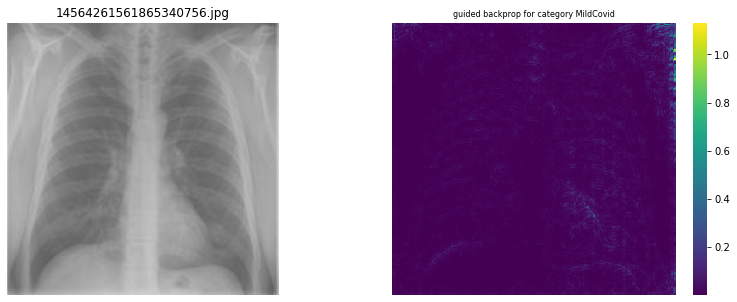

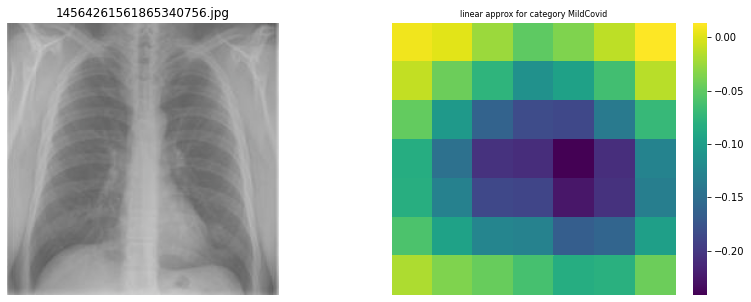

            Predicted Probability  Ground Truth
Finding                                        
LowCovid                    0.987          True
NoCovid                     0.041         False
MildCovid                   0.007         False
SevereCovid                 0.001         False


In [7]:
V.plot_map(model, dataloader, LABEL, covid=True, saliency_layer='features.norm5')